<h1 style="font-size:30px;text-align: center;">- Introduction to Data Science  - Student Project -</h1>
<h1 style="font-size:25px;text-align: center;">- Bike Sharing - Success classification -</h1>

![Algebra](https://repozitorij.algebra.hr/sites/repozitorij.algebra.hr/files/algebra_subbrand_vu_color-black_h_1.png)

=========================================================================================================================
<b>*Made: January 2021.* </b>

<b>*Author: Mislav Spajić, univ. bacc. ing. agr.*</b>

<b>*Menthors: doc. dr. sc. Goran Klepac, mr. sc. Mirko Talajić*</b>

## Table of Contents

[1. Introduction](#introduction)
   > [1.1. Goal of the project](#goal)   
   > [1.2. Dataset description](#dataset)    
   > [1.3. Problem description](#problem)
   

[2. Prerequisites](#prereq)


[3. Data wrangling](#wrangle)
    
   > [3.1. Importing data](#data)  
   > [3.2. Missing values](#dqual)   
   > [3.3. Deriving the target variable](#derive)    
   > [3.4. Dropping unneeded columns](#drop)

[4. Exploratory data analysis](#eda)

   > [4.1. Distribution of categorical variables](#distcat)  
   > [4.2. Distribution of continuous variables](#distcont)    
   > [4.3. Numerical variables](#explore_num)
   
[5. Exploratory data analysis](#dvad_main)

   > [5.1. Distribution of numericals](#dvad_distributionn)    
   > [5.2. Distribution of categoricals](#dvad_distributionc)    
   > [5.3. Variable relationship](#dvad_rel)
  
   
---------------------------------------------------------------------
   

## 1. Introduction<a name="introduction"></a>

### 1.1. Goal of the project<a name="goal"></a>

&nbsp;&nbsp;&nbsp;&nbsp;Goal of this student project was to successfully apply knowledge learnt in the class 'Introduction to Data Science' on a given dataset. Primarily, application of attribute relevance analysis techniques we have learnt (Weight of Evidence and Information Value), prediction of success/non-success of the target variable using logistic regression model and other classification algorithms, evaluation of the models using AUC-ROC curve, classification matrix, etc. I have been assigned with a dataset regarding one bike sharing service usage. More details about the dataset in the next chapter.

### 1.2. Dataset description<a name="dataset"></a>

&nbsp;&nbsp;&nbsp;&nbsp;I will be using Bike sharing dataset provided by UCI Machine Learning Repository. 

&nbsp;&nbsp;&nbsp;&nbsp;Data was obtained from this link : https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset#.

&nbsp;&nbsp;&nbsp;&nbsp;This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. 

&nbsp;&nbsp;&nbsp;Attribute Information:

&nbsp;&nbsp;&nbsp;Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv.

- **instant**: record index
- **dteday** : date
- **season** : season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr** : year (0: 2011, 1:2012)
- **mnth** : month ( 1 to 12)
- **hr** : hour (0 to 23)
- **holiday** : weather day is holiday or not (extracted from [Web Link])
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
+ **weathersit** :
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- **atemp**: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered





### 1.3. Problem description<a name="problem"></a>

&nbsp;&nbsp;&nbsp;&nbsp;Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research.

&nbsp;&nbsp;&nbsp;&nbsp;Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. Authors of this dataset aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information was extracted from http://www.freemeteo.com.

&nbsp;&nbsp;&nbsp;&nbsp;Since the goal of this project is to create a binary clasiffication model and the logical target variables in this dataset (casual, registered, cnt) are discrete numerical variables, I will derive the binary traget variable from count of the total rental bikes (cnt). Was some day success (1) or non-success (0) will be determined by comparing the value for that day with monthly mean in which that day falls in. 

&nbsp;&nbsp;&nbsp;&nbsp;I will use the daily data to try to successfully predict was some day success (1) or non-succes (0).

# 2. Prerequisites<a name="prereq"></a>

&nbsp;&nbsp;&nbsp;&nbsp;Importing needed Python librarires & modules and initial setup.

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import pandas_profiling
# from scipy import stats
# import seaborn as sns
# import cufflinks as cf
# import plotly.offline
# import time

# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score
# from sklearn.metrics import roc_curve, roc_auc_score, make_scorer

%matplotlib inline 
#Jupyter inline magic command needed to display plots
plt.style.use("ggplot")
#Setting different plot style than default, using ggplot style derived from famous R library ggplot2
seed=42
#Defining seed variables to use in algorithms which rely on randomness, this is for reporoducibility

# 3. Data wrangling<a name="wrangle"></a>

## 3. 1. Importing data<a name="data"></a>

&nbsp;&nbsp;&nbsp;&nbsp; I will use the daily data to conduct the analysis and modelling.

In [154]:
#Importing the data and checking how does it look
data=pd.read_csv("https://github.com/MySlav/BikeSharingProject/raw/main/data/day.csv")
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 3. 2. Missing values<a name="dqual"></a>

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


We can see we imported 16 columns and 731 rows, none of the columns contains missing values.

In [156]:
#We can also check the missing values this way
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 3.3. Deriving the target variable<a name="derive"></a>

&nbsp;&nbsp;&nbsp;&nbsp;As mentioned afore, because of the nature of this project, we need a binary target variable. I will derive the binary traget variable from count of the total rental bikes (cnt). Was some day success (1) or non-success (0) will be determined by comparing the value for that day with monthly mean in which that day falls in. 

success = cnt $\ge$ mean (cnt for that month)

In [157]:
#Calculating the monthly means needed
mmean=data.groupby('mnth').mean()['cnt'].round()
#Converting it to dictionary object
mmean=mmean.to_dict()
mmean

{1: 2176.0,
 2: 2655.0,
 3: 3692.0,
 4: 4485.0,
 5: 5350.0,
 6: 5772.0,
 7: 5564.0,
 8: 5664.0,
 9: 5767.0,
 10: 5199.0,
 11: 4247.0,
 12: 3404.0}

&nbsp;&nbsp;&nbsp;&nbsp;This looks good, now we can create a new column "success" based on the aforementioned expression.

In [158]:
#Creating the needed series and checking it
success=(data["cnt"]>=data["mnth"].map(mmean)).astype(int)
success.value_counts()

0    397
1    334
dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;This is good, distribution of the derived variable is not heavily skewed neither towards success neither to non-success.

In [159]:
#Adding the variable to the dataframe
data["success"]=success

## 3.4. Dropping unneeded columns<a name="drop"></a>

&nbsp;&nbsp;&nbsp;&nbsp; Since we derived the "success" column from the "cnt" we should drop that column. Also, since "cnt" is the sum of "casual" and "registered" they will be heavily correlated and we should drop that also.

In [160]:
data.drop(columns=["cnt","casual","registered"],inplace=True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,success
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,0


&nbsp;&nbsp;&nbsp;&nbsp;Since the initial data contains columns for year and month we can derive the day of the month from "dteday" and drop that column without loosing any information. We can also drop "instant" as this is record index.

In [161]:
dayofmonth=(data["dteday"].str.slice(8,10)).astype(int)
data["dteday"]=dayofmonth
data.rename(columns={"dteday":"dayofmonth"},inplace=True)
data.drop(columns="instant",inplace=True)
data.head()

,dayofmonth,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,success
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,0
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,0
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,0


&nbsp;&nbsp;&nbsp;&nbsp;Looks fine now, we can proceed to the exploratory data analysis.

# 4. Exploratory data analysis<a name="eda"></a>

## 4.1. Univariate analysis

### 4.1.1. Distribution of categorical variables<a name="distcat"></a>

&nbsp;&nbsp;&nbsp;&nbsp;I will quickly see the distribution of categorical variables using bar plots.

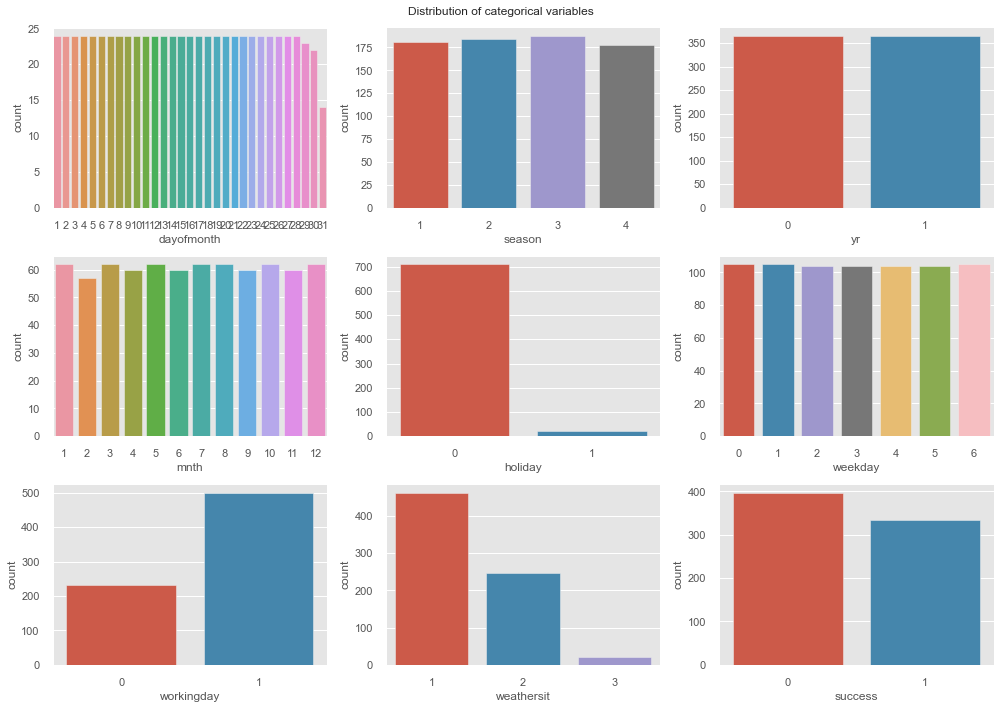

In [289]:
fig, axes =plt.subplots(3,3,figsize=(14,10))
axes = axes.flatten()
fig.suptitle('Distribution of categorical variables')

for ax, catplot in zip(axes, data[cat].columns):
    sns.countplot(x=catplot, data=data[cat], ax=ax)

plt.tight_layout()  
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;This all looks pretty reasonable, most of the data is evenly distributed. 

- "dayofmonth" - it is logical that there are less total days like 31

- "holiday" - it is heavily skewed toward non-holiday since there are many more days which are non-holiday than holiday

- "workingday" - same logic as above, there are many more working days than non-working, so it is ok

- "weathersit" - there are many more days with fine weather than with bad, logical for Washington DC weather data

## 4.2. Distribution of continuous variables<a name="distcont"></a>

In [215]:
data.drop(columns=cat).describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


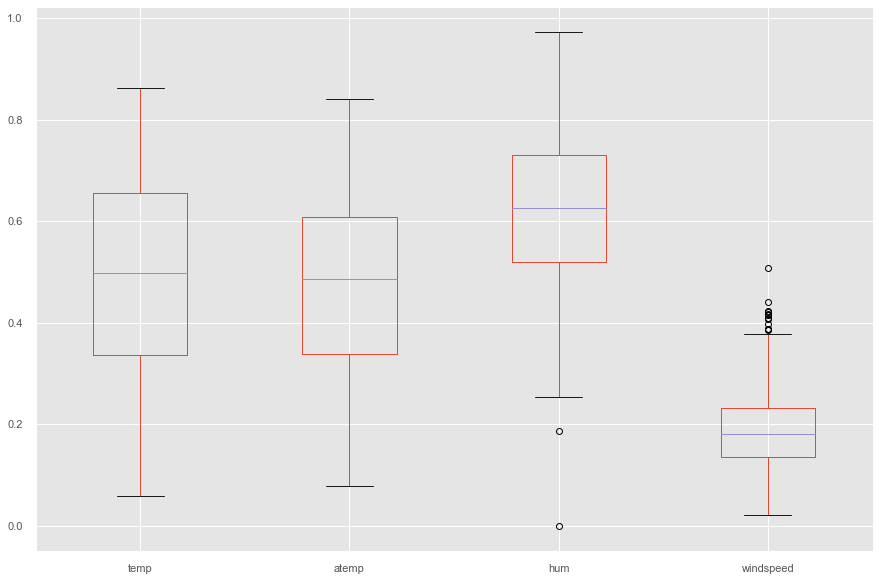

In [216]:
data.drop(columns=cat).boxplot(figsize=(15,10))
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;We can see there are some outliers in "hum" and "windspeed" variables. I will deal with them later on.

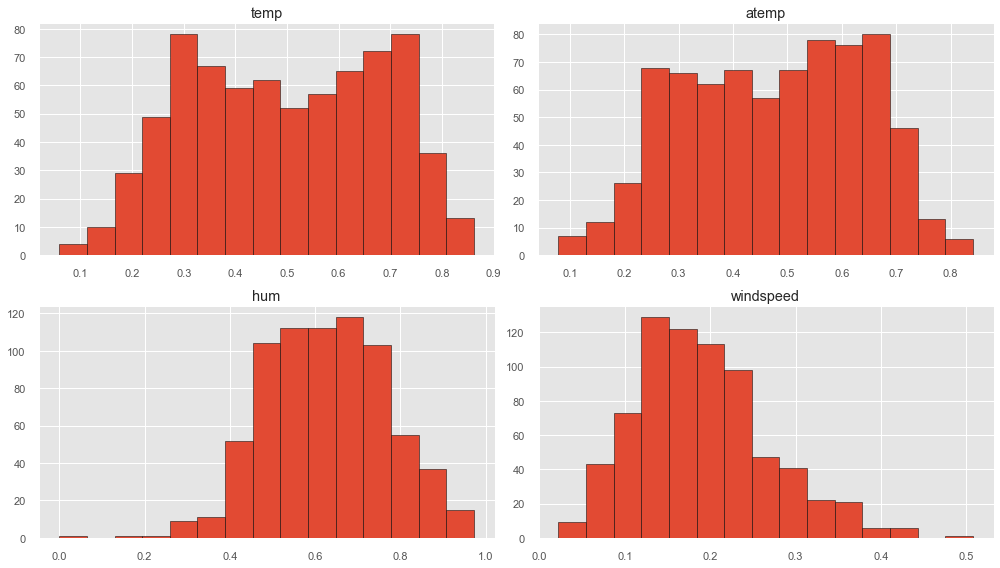

In [294]:
data.drop(columns=cat).hist(figsize=(14, 8),ec="black", bins=15)
plt.tight_layout()
plt.show()

These look pretty good, except the aforementioned outliers in "hum" and "windspeed".Humidity and windspeed are distributed in a bell-like shaped curve. It is interesting that

In [10]:
def describe_data(dataset):
    values = []
    for col in np.arange(9,16):
            values.append({
            'Column': dataset.iloc[:,col].name,
            'Mean': round(np.mean(dataset.iloc[:,col]), 2),
            'Min': round(np.min(dataset.iloc[:,col]), 2),
            'Max': round(np.max(dataset.iloc[:,col]), 2),
            'Std': round(np.std(dataset.iloc[:,col]), 2),
            'Max Z-Val': round(np.abs(max(stats.zscore(dataset.iloc[:,col]))), 2)
            })
    return pd.DataFrame(values)

In [40]:
describe_data(hour2)

,Column,Mean,Min,Max,Std,Max Z-Val
0,temp,0.48,0.02,1.00,0.19,2.71
1,atemp,0.46,0.00,0.95,0.17,2.88
2,hum,0.64,0.00,1.00,0.19,1.89
3,windspeed,0.19,0.00,0.55,0.12,3.11
4,casual,25.73,0.00,139.00,29.71,3.81
5,registered,129.85,0.00,582.00,119.69,3.78
6,cnt,155.58,1.00,594.00,138.45,3.17


In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
hour2=hour.copy()
for col in np.arange(9,16):
    hour2.iloc[:,col]=scaler.fit_transform(hour2.iloc[:,col].values.reshape(-1, 1))


In [101]:
def woe_iv_calculation(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append(OrderedDict({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        }))
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    return dset, iv